# xmitgcm llcreader demo

This notebooks contains a demonstration of reading and visulizing data from the
[NAS ECCO Data Portal](https://data.nas.nasa.gov/ecco/).
It makes use of the following software libraries:

- [xmitgcm](https://xmitgcm.readthedocs.io/en/latest/llcreader.html): provides the `llcreader` module which makes all of this work
- [xarray](http://xarray.pydata.org/en/latest/): the basic data structures and computational library for the datasets 
- [dask](https://dask.org/): the parallel computing library which enables lazy representations of huge arrays
- [holoviews](http://holoviews.org/): interactive visualizations

We start by importing the necessary libraries

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import gcsfs
%matplotlib inline

import xmitgcm.llcreader as llcreader
import holoviews as hv
from holoviews.operation.datashader import regrid
hv.extension('bokeh')

### Get the coords information

In [ ]:
model = llcreader.ECCOPortalLLC4320Model()
model

In [ ]:
ds = model.get_dataset(varnames=['Eta', 'U', 'V'], k_levels=[26,40,53,68,77], type='latlon')
ds

In [4]:
# how many TB?
ds.nbytes / 1e12

27.732028368128

In [5]:
ds_eta = ds.Eta.isel(i=slice(7512,7592), j=slice(9014,9074)).sel(time=slice("2011-10-01", "2011-10-31"))
ds_u = ds.U.isel(i_g=slice(7512,7593), j=slice(9014,9074)).sel(time=slice("2011-10-01", "2011-10-31")).squeeze()
ds_v = ds.V.isel(i=slice(7512,7592), j_g=slice(9014,9075)).sel(time=slice("2011-10-01", "2011-10-31")).squeeze()
#ds_n = xr.merge([ds_eta, ds_u, ds_v])
#ds_n
ds_u

<xarray.DataArray 'U' (time: 744, j: 500, i_g: 600)>
dask.array<getitem, shape=(744, 500, 600), dtype=float32, chunksize=(1, 500, 600), chunktype=numpy.ndarray>
Coordinates:
  * i_g      (i_g) int64 7100 7101 7102 7103 7104 ... 7695 7696 7697 7698 7699
  * j        (j) int64 8700 8701 8702 8703 8704 ... 9195 9196 9197 9198 9199
    k        int64 5
  * time     (time) datetime64[ns] 2011-10-01 ... 2011-10-31T23:00:00
    drF      float32 dask.array<chunksize=(), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    hFacW    (j, i_g) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    PHrefC   float32 dask.array<chunksize=(), meta=np.ndarray>
    rAw      (j, i_g) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
    Z        float32 dask.array<chunksize=(), meta=np.ndarray>
    rhoRef   float32 dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    standard_name:  sea_water_x_velocity
    mate:           V
    long_name:      Zonal Component of Velocity
    units:          m s-1

In [6]:
# how many GB?
ds_u.nbytes / 1e9

0.8928

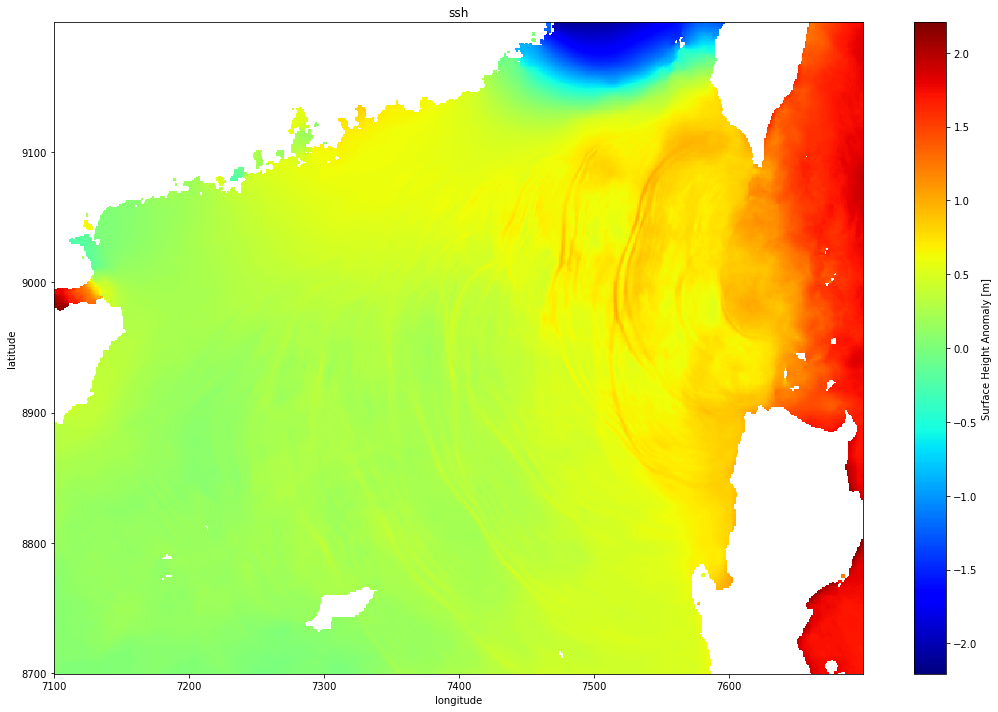

In [7]:
plt.rcParams['figure.figsize'] = (15, 10)
ds_eta.isel(time=0).plot(cmap='jet')
plt.title("ssh")
plt.xlabel("longitude")
plt.ylabel("latitude")
#plt.xticks(range(1,601,60), ds.XC[0, 7100:7700:60], color='blue')
#plt.yticks(range(1,501,50), ds.YC[8700:9200:50, 0], color='blue')
plt.tight_layout()
plt.draw()

In [8]:
## local laptop
# plt.show()

In [9]:
from dask.diagnostics import ProgressBar

In [10]:
#with ProgressBar():
#    ds_eta.to_netcdf('./llc4320_ssh.nc', format='NETCDF4')

In [14]:
with ProgressBar():
    ds_u.to_netcdf('./llc4320_ssu.nc', format='NETCDF4')

[########################################] | 100% Completed | 18min 50.1s


In [13]:
with ProgressBar():
    ds_v.to_netcdf('./llc4320_ssv.nc', format='NETCDF4')

[########################################] | 100% Completed | 19min 20.3s
